# Time Series Analysis on Boston Data

# Step 1: Import Libraries

In [9]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.datasets import fetch_openml

# Step 2: Load the Boston Housing Dataset

In [13]:
# Step 2: Load Boston Dataset
boston = fetch_openml(name="boston", version=1, as_frame=True)
df = boston.frame

# Preview data
print(df.head())

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


# Step 3: Simulate a Time Series using 'AGE' and 'MEDV' (Median House Value)


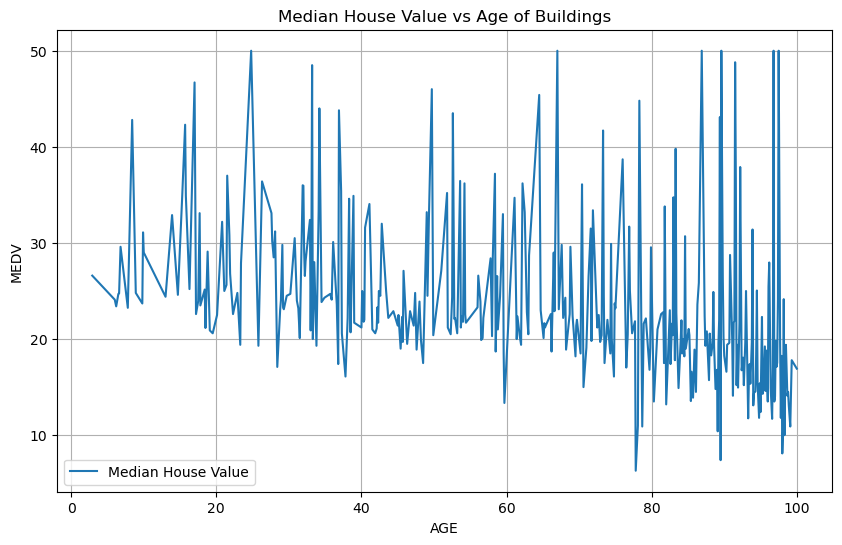

In [17]:
# We'll sort by 'AGE' to simulate time progression
df_sorted = df.sort_values(by='AGE')
df_grouped = df_sorted.groupby('AGE')['MEDV'].mean().reset_index()

# Visualize
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['AGE'], df_grouped['MEDV'], label='Median House Value')
plt.title('Median House Value vs Age of Buildings')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.grid(True)
plt.legend()
plt.show()


# Step 4: Check for Stationarity

In [19]:
# Step 4: Check for Stationarity
adf_result = adfuller(df_grouped['MEDV'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: -4.879811644943255
p-value: 3.817114412843644e-05


# Step 5: Fit an ARIMA Model

In [21]:
# Step 5: Fit ARIMA Model
model = ARIMA(df_grouped['MEDV'], order=(5, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   MEDV   No. Observations:                  356
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1249.346
Date:                Mon, 21 Apr 2025   AIC                           2510.693
Time:                        20:25:53   BIC                           2533.926
Sample:                             0   HQIC                          2519.936
                                - 356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8586      0.050    -17.112      0.000      -0.957      -0.760
ar.L2         -0.7458      0.063    -11.921      0.000      -0.868      -0.623
ar.L3         -0.5624      0.071     -7.943      0.0

# Step 6: Forecasting

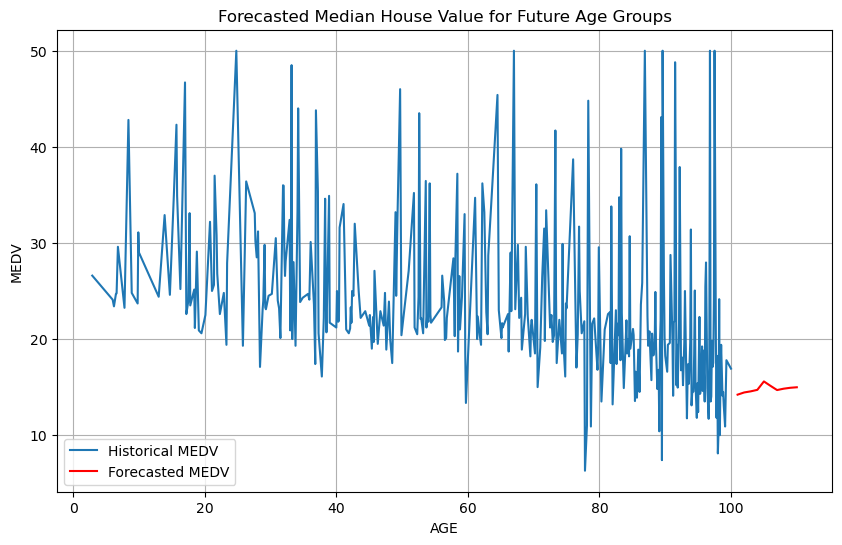

In [23]:
# Step 6: Forecast
forecast = model_fit.forecast(steps=10)
future_ages = np.arange(df_grouped['AGE'].max() + 1, df_grouped['AGE'].max() + 11)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df_grouped['AGE'], df_grouped['MEDV'], label='Historical MEDV')
plt.plot(future_ages, forecast, color='red', label='Forecasted MEDV')
plt.title('Forecasted Median House Value for Future Age Groups')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.legend()
plt.grid(True)
plt.show()